In [112]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn import metrics 
# visualization
from sklearn.tree import plot_tree
# from sklearn.tree import plot_tree, export_tex
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df= pd.read_csv("titanic-passengers.csv",sep=';')

cat_gender={'Sex':{'male':0,'female':1}} #maping gender to binary
surv_to_bin={'Survived':{'No':0,'Yes':1}} # maping survival to binary
df.replace(cat_gender,inplace=True)
df.replace(surv_to_bin,inplace=True)

one_hot=pd.get_dummies(df['Embarked'])
df=df.drop('Embarked',axis=1)
df=df.join(one_hot)
df.sort_values(['Cabin'])   #sorting passengers acc to Ca No.
df=df.drop('Cabin',axis=1) #seems to be useless as there's too much missing data
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)  #creating a new column(title) instead of name
df = df.drop(columns='Name')

df['Age'].fillna(int(df['Age'].mean()), inplace=True) #replace missing age values with column's mean


#minimizeing titles numbers to only 5 
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4}) #same as we did with Sex &Embarked but in a different way



df["FamilySize"] = ""
df.FamilySize=df['SibSp']+df['Parch']
df=df.drop('Parch',axis=1)
df=df.drop('SibSp',axis=1)
df=df.drop('Ticket',axis=1)

df.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,C,Q,S,Title,FamilySize
0,343,0,2,0,28.0,13.0000,0,0,1,2,0
1,76,0,3,0,25.0,7.6500,0,0,1,2,0
2,641,0,3,0,20.0,7.8542,0,0,1,2,0
3,568,0,3,1,29.0,21.0750,0,0,1,3,4
4,672,0,1,0,31.0,52.0000,0,0,1,2,1


In [13]:
x = df.drop("Survived", axis=1)
y = df["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [109]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

print(acc_decision_tree)

print("score:{}".format(accuracy_score(y_test, y_pred)))


100.0
score:0.7399103139013453


KeyError: 2

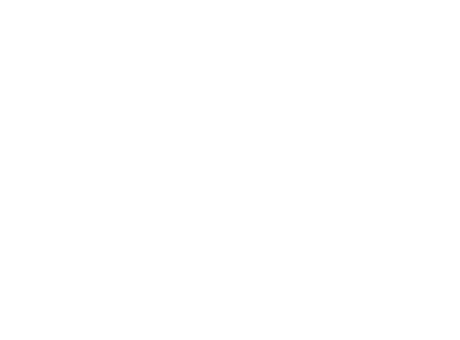

In [113]:
plt.figure(figsize=(8, 6))
plot_tree(decision_tree, feature_names=x, class_names=y, filled=True);

In [105]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1000)  #accuracy didn't vary alot by changing n_estimators values from 10 to 5000  
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

print("Accuracy:", metrics.accuracy_score(y_test, Y_pred))  #Measuring the accuracy of our model


Accuracy: 0.8071748878923767
